In [1]:
# Import dependencies
from pypharma_nlp.pubmed import publications_per_year
from pypharma_nlp.pubmed import plot_publications_per_year

In [2]:
years = range(1970, 2019)
year, counts = publications_per_year()

Using query: '("<YEAR>"[Date - Publication])'

year count
----------
1970 219358
1971 223608
1972 227806
1973 231080
1974 235065
1975 249159
1976 254911
1977 262170
1978 272526
1979 282071
1980 280624
1981 283541
1982 295622
1983 309395
1984 318132
1985 335151
1986 349495
1987 367787
1988 386793
1989 402505
1990 410701
1991 413052
1992 417743
1993 427251
1994 438013
1995 448937
1996 458495
1997 456623
1998 474571
1999 493641
2000 532321
2001 547359
2002 564938
2003 593980
2004 639064
2005 699723
2006 749011
2007 785870
2008 836334
2009 876889
2010 941498
2011 1019526
2012 1087333
2013 1147753
2014 1203188
2015 1254865
2016 1280235
2017 1293205
2018 1332545


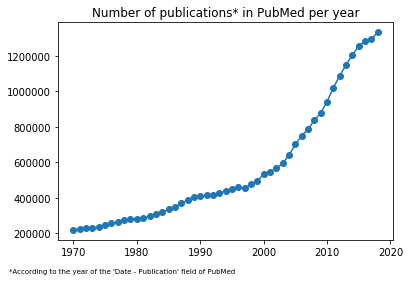

In [3]:
plot_publications_per_year(year, counts)

In [4]:
years = range(1970, 2019)
year, counts = publications_per_year(query="(\"neoplasms\"[MeSH Terms]")

Using query: '(("neoplasms"[MeSH Terms]) AND ("<YEAR>"[Date - Publication])'

year count
----------
1970 20646
1971 21719
1972 22248
1973 22774
1974 23634
1975 24740
1976 25259
1977 26840
1978 28436
1979 30293
1980 31356
1981 32120
1982 33757
1983 36109
1984 38906
1985 40399
1986 41385
1987 42282
1988 43527
1989 46885
1990 47804
1991 46044
1992 47561
1993 48811
1994 50967
1995 51464
1996 53300
1997 54300
1998 55846
1999 57169
2000 60136
2001 62469
2002 65775
2003 70955
2004 74672
2005 81974
2006 86628
2007 92490
2008 97800
2009 102340
2010 111425
2011 120786
2012 128114
2013 134590
2014 141908
2015 145218
2016 142663
2017 138275
2018 110291


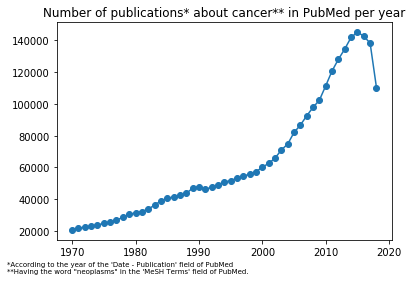

In [6]:
plot_publications_per_year(year, counts, about="cancer**", 
    extra_footnote="**Having the word \"neoplasms\" in the 'MeSH Terms' field of PubMed.")

In [105]:
# Get the counts for each year
print("year count")
counts = []
years = range(1970, 2019)
for year in years:
    handle = Entrez.esearch(db="pubmed", term="(\"%d\"[Date - Publication])" % \
        year)
    record = Entrez.read(handle)
    count = int(record["Count"])
    print(year, count)
    counts.append(count)

year count
1970 219358
1971 223608
1972 227806
1973 231080
1974 235065
1975 249159
1976 254911
1977 262170
1978 272526
1979 282071
1980 280624
1981 283541
1982 295622
1983 309395
1984 318132
1985 335151
1986 349495
1987 367787
1988 386793
1989 402505
1990 410701
1991 413052
1992 417743
1993 427251
1994 438013
1995 448937
1996 458495
1997 456623
1998 474570
1999 493641
2000 532321
2001 547359
2002 564938
2003 593980
2004 639064
2005 699723
2006 749011
2007 785870
2008 836335
2009 876889
2010 941498
2011 1019524
2012 1087332
2013 1147752
2014 1203186
2015 1254862
2016 1280217
2017 1293109
2018 1332500


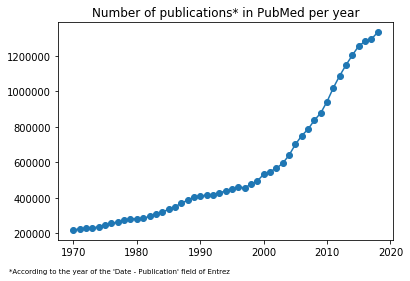

In [123]:
# Plot the counts
plt.title("Number of publications* in PubMed per year")
plt.plot(years, counts, linestyle='-', marker='o')
plt.figtext(0.01, 0.01, 
    "*According to the year of the 'Date - Publication' field of Entrez", 
    horizontalalignment="left", fontsize="x-small")
plt.savefig("../figures/num_publications_year.pdf")

In [107]:
# Get the counts for each year for cancer
print("year count")
cancer_counts = []
for year in years:
    handle = Entrez.esearch(db="pubmed", term="(\"Cancer\"[Title/Abstract]) AND (\"%d\"[Date - Publication])" % \
        year)
    record = Entrez.read(handle)
    count = int(record["Count"])
    print(year, count)
    cancer_counts.append(count)

year count
1970 2336
1971 2395
1972 2348
1973 2127
1974 2475
1975 3613
1976 3882
1977 4324
1978 4631
1979 5154
1980 5554
1981 5930
1982 6311
1983 7237
1984 8131
1985 8679
1986 9258
1987 9894
1988 10862
1989 12767
1990 13382
1991 13221
1992 14563
1993 15376
1994 17224
1995 18060
1996 19697
1997 21015
1998 22308
1999 24402
2000 27023
2001 28402
2002 30800
2003 34075
2004 37978
2005 42697
2006 46395
2007 51497
2008 55915
2009 60308
2010 68393
2011 76954
2012 86504
2013 94110
2014 102932
2015 110508
2016 115025
2017 120689
2018 126763


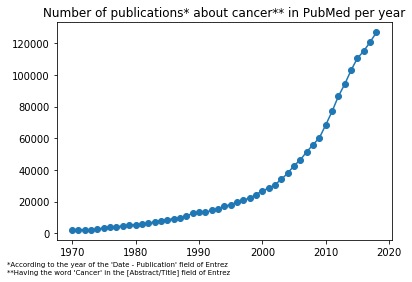

In [120]:
# Plot the counts
plt.title("Number of publications* about cancer** in PubMed per year")
plt.plot(years, cancer_counts, linestyle='-', marker='o')
plt.figtext(0.01, 0.01, 
    """*According to the year of the 'Date - Publication' field of Entrez
**Having the word 'Cancer' in the [Abstract/Title] field of Entrez""", 
    horizontalalignment="left", fontsize="x-small")
plt.savefig("../figures/num_publications_year_cancer.pdf")

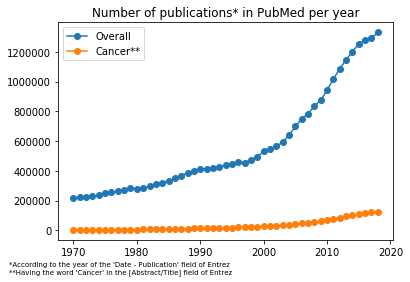

In [121]:
# Plot the combined counts
plt.title("Number of publications* in PubMed per year")
plt.plot(years, counts, linestyle='-', marker='o')
plt.figtext(0.01, 0.01, 
    """*According to the year of the 'Date - Publication' field of Entrez
**Having the word 'Cancer' in the [Abstract/Title] field of Entrez""", 
    horizontalalignment="left", fontsize="x-small")
plt.plot(years, cancer_counts, linestyle='-', marker='o')
plt.legend(labels=("Overall", "Cancer**"))
plt.savefig("../figures/num_publications_year_combined.pdf")